# Data download and processing from Uniprot

Downloaded the data on 01 May 2024. 254,929 results filtering for "Catalytic activity" and Reviewed "Swiss-Prot".  

Selected download TSV and the columns, Seqeunce (under Sequences tab), EC number (under Function).

Unzipped the downloaded file.


In [1]:
import pandas as pd

df = pd.read_csv('data/uniprot/uniprotkb_AND_reviewed_true_AND_protein_2024_05_01.tsv', sep='\t')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/uniprot/uniprotkb_AND_reviewed_true_AND_protein_2024_05_01.tsv'

In [2]:
# Filter to only include sequneces < 512
df = df[df['Length'] < 512]
df

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-; 3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
8,A0A061I403,FICD_CRIGR,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108; 3.1.4.-,455
...,...,...,...,...,...
254921,P83855,ACLP_MOUSE,GVYMEIGRCRXEAXRRRKEAV,4.6.1.1,21
254922,P85957,PER_PSEMZ,AMAGTATVQGQGTR,1.11.1.7,14
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


# Explode out EC number so each EC has it's own row

In [3]:
# Drop rows that don't have an ec number
df = df[df['EC number'].notna()]
print(len(df))
# Now expand out the ones we have left
df['EC number'] = [ec.split(';') for ec in df['EC number']]
df = df.explode('EC number')
# Clean the EC numbers
df['EC number'] = [ec.replace(' ', '') for ec in df['EC number']]
df

199220


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_34484/1265130750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC number'] = [ec.split(';') for ec in df['EC number']]


,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
...,...,...,...,...,...
254921,P83855,ACLP_MOUSE,GVYMEIGRCRXEAXRRRKEAV,4.6.1.1,21
254922,P85957,PER_PSEMZ,AMAGTATVQGQGTR,1.11.1.7,14
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


In [4]:
df.to_csv('data/uniprot/processed.csv', index=False)

### Added a bit here to get rid of the short ones

In [42]:
df = pd.read_csv('../processed_data/protein2EC.csv')
df = df[df['Length'] >= 100 ]

In [44]:
df = df.drop_duplicates(subset=['Sequence', 'EC number'])
df = df[~df['EC number'].str.contains('-')]

In [46]:
df = df[['Entry', 'Entry Name', 'Sequence', 'EC number', 'Length']]
df

,Entry,Entry Name,Sequence,EC number,Length
1,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
4,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
5,A0A061I403,FICD_CRIGR,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108,455
...,...,...,...,...,...
173689,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
173690,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
173691,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
173692,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


### Comparison to the dataset used in CLEAN

In [31]:
clean_df = pd.read_csv('/disk1/jyang4/repos/CLEAN/app/data/split100.csv', sep='\t')
clean_df = clean_df.drop_duplicates(subset=['Sequence', 'EC number'])
clean_df

,Entry,EC number,Sequence
0,P51451,2.7.10.2,MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
1,C7C422,3.5.2.6,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...
2,Q07457,2.3.2.27,MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...
3,Q07009,3.4.22.53,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...
4,Q9TTH8,3.4.22.54,MPTVISASVAPRTGAEPRSPGPIAQAAQGKGTEAGGGNPSGIYSAI...
...,...,...,...
227357,Q97HD1,3.1.11.6,MPSKKESYESMIKELEKIVSSMENEELPLEEAMKNYEDGVKLCDKL...
227358,A0A140CUL9,1.1.99.13,MAENNTYDAIVIGSGISGGWATKELTEKGLKTLMLERGRNIEHVKD...
227359,W6JQJ6,1.13.12.2,MNKNNRHPADGKKPITIFGPDFPFAFDDWLEHPAGLGSIPAARHGE...
227360,B3IVI7,3.5.1.30,MRIALYQGAPKPLDVPGNLQRLRHQAQLAAERGAQLLVCPEMFLTG...


In [30]:
clean_df['Length'] = [len(seq) for seq in clean_df['Sequence']]
clean_df = clean_df[clean_df['Length'] < 512]
clean_df = clean_df[clean_df['Length'] >= 100]
clean_df

,Entry,EC number,Sequence,Length
0,P51451,2.7.10.2,MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...,505
1,C7C422,3.5.2.6,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,270
6,P00917,4.2.1.1,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,261
7,Q9ULX7,4.2.1.1,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,337
11,P10506,2.7.12.2,MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...,340
...,...,...,...,...
227341,Q9KQH9,2.3.1.179,MSKRRVVVTGMGMLSPVGNTVESSWKALLAGQSGIVNIEHFDTTNF...,414
227352,Q11WK3,6.3.5.2,MTEKILILDFGSQYTQLIARRVRELNVYCEIHPYNKAPQIDGTVKG...,509
227354,B1KNT2,4.2.1.59,MSEQLNTMDIKEIMSFLPHRYPFLLIDRVLDYTPGETLHAIKNVTI...,152
227360,B3IVI7,3.5.1.30,MRIALYQGAPKPLDVPGNLQRLRHQAQLAAERGAQLLVCPEMFLTG...,264


### Perform clustering using mmseqs

In [38]:
#generate a fasta file as input to mmseqs
with open('clustering/swissprot.fasta', 'w') as f:
    for index, row in df.iterrows():
        f.write(f'>{row["Entry"]}\n{row["Sequence"]}\n')

# !mmseqs createdb examples/swissprot.fasta swissprot

In [39]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes50 clustering/mmseqs_tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1

easy-cluster clustering/swissprot.fasta clustering/clusterRes50 clustering/mmseqs_tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residu

In [40]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes30 clustering/mmseqs_tmp --min-seq-id 0.3 -c 0.8 --cov-mode 1

easy-cluster clustering/swissprot.fasta clustering/clusterRes30 clustering/mmseqs_tmp --min-seq-id 0.3 -c 0.8 --cov-mode 1 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residu

Time for processing: 0h 0m 8s 9ms
align clustering/mmseqs_tmp/4220174760281188982/clu_tmp/12773599051404603500/input_step_redundancy clustering/mmseqs_tmp/4220174760281188982/clu_tmp/12773599051404603500/input_step_redundancy clustering/mmseqs_tmp/4220174760281188982/clu_tmp/12773599051404603500/pref_step0 clustering/mmseqs_tmp/4220174760281188982/clu_tmp/12773599051404603500/aln_step0 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.3 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 1 --max-seq-len 65535 --comp-bias-corr 0 --comp-bias-corr-scale 1 --max-rejected 2147483647 --max-accept 2147483647 --add-self-matches 0 --db-load-mode 0 --pca substitution:1.100,context:1.400 --pcb substitution:4.100,context:5.800 --score-bias 0 --realign 0 --realign-score-bias -0.2 --realign-max-seqs 2147483647 --corr-score-weight 0 --gap-open aa:11,nucl:5 --gap-extend aa:1,nucl:2 --zdrop 40 --thread

25680
7760


,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721
4,A0A061I403,FICD_CRIGR,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108,455,Q6AY47,Q6AY47
...,...,...,...,...,...,...,...
161733,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352
161734,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8
161735,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115
161736,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8


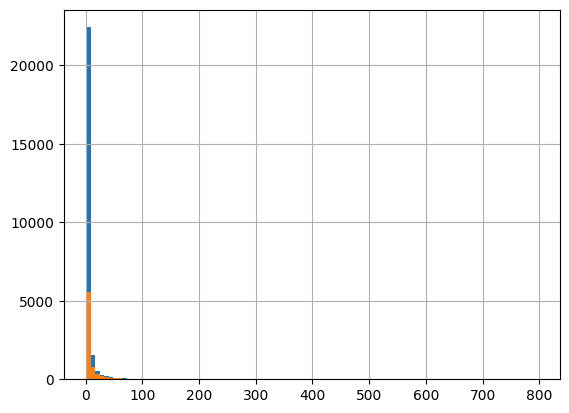

In [47]:
def process_clustering(name):
    clustering = pd.read_csv('clustering/{}_cluster.tsv'.format(name), delimiter='\t', header=None)
    #rename heading as cluster reference and id
    clustering.columns = [name, 'Entry']
    clustering.drop_duplicates(subset='Entry', keep='first', inplace=True)
    print(clustering[name].nunique())
    clustering[name].value_counts().hist(bins=100)
    return clustering

cluster50 = process_clustering('clusterRes50')
cluster30 = process_clustering('clusterRes30')

df = pd.merge(df, cluster50, on='Entry', how='left')
df = pd.merge(df, cluster30, on='Entry', how='left')
df

In [24]:
df.to_csv('../processed_data/protein2EC.csv', index=False)